In [104]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1

In [105]:
power_train_df = pd.read_csv('h5w7_pr1_power_train.csv', header=0)
power_test_df = pd.read_csv('h5w7_pr1_power_test.csv', header=0)
power_train = power_train_df.to_numpy()
power_test = power_test_df.to_numpy()

In [122]:
class LinearRegression:

    def __init__(self, X_train, y_train, X_test, y_test, A, B, max_epochs=100):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.A = A
        self.B = B
        self.max_epochs = max_epochs

    def _initialize(self):
        self.w = np.random.uniform(-0.1, 0.1, size=(self.X_train.shape[1],))

    def MSE(self, w_, X, y):
        sum = 0
        for x, y_true in zip(X, y):
            y_hat = np.matmul(w_.T, x)
            dist = (y_hat-y_true)**2
            sum += dist
        
        return sum/np.size(y)

    def _shuffle(self):
        idx = random.sample(range(self.X_train.shape[0]), self.X_train.shape[0])

        temp_X = np.take(self.X_train, idx, axis=0)
        temp_y = np.take(self.y_train, idx)

        self.X_train = temp_X
        self.y = temp_y

    def fit(self):
        self._initialize()
        self._shuffle()
        m = 1
        w_hat = np.zeros(self.w.shape)

        rms_err = []
        rms_err.append(np.sqrt(self.MSE(self.w, self.X_train, self.y_train)))

        halt = False
        i = 0
        while m <= self.max_epochs and not halt:
            for x, y in zip(self.X_train, self.y_train):
                eta = self.A/(self.B+i)
                grad = (np.matmul(self.w.T, x)-y)*x
                self.w -= eta*grad
                i += 1

                if rms_err[-1] < 0.001*rms_err[0]:
                    halt = True
                    w_hat = np.copy(self.w)
                    break
            
            
            if m == self.max_epochs:
                w_hat = np.copy(self.w)
            
            rms_err.append(np.sqrt(self.MSE(self.w, self.X_train, self.y_train)))
            m += 1

        return w_hat, rms_err

    def predict(self, best_w, X):
        y_pred = np.zeros((X.shape[0],))
        for i, x in enumerate(X):
            y_pred[i] = np.matmul(best_w.T, x)

        return y_pred

## Part b)

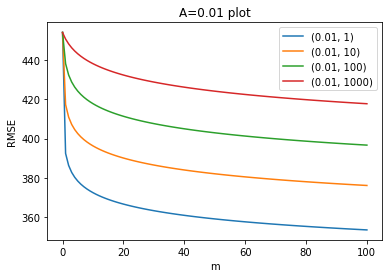

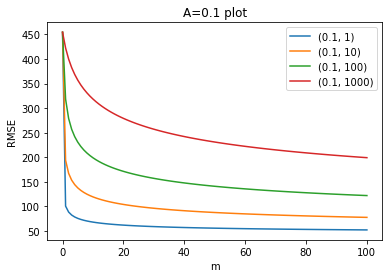

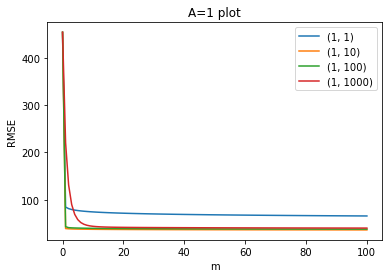

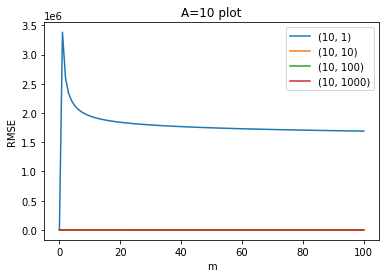

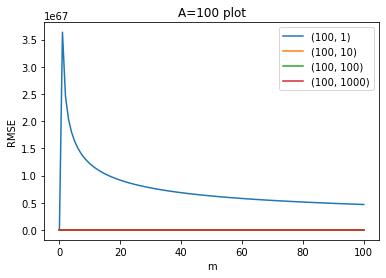

In [123]:
X_train_power = power_train[:, :4]
y_train_power = power_train[:, 4]

X_test_power = power_test[:, :4]
y_test_power = power_test[:, 4]

A = [0.01, 0.1, 1, 10, 100]
B = [1, 10, 100, 1000]

rms_errs = {}
results = {}

for a in A:
    plt.figure()
    legend = []
    for b in B:
        lin_reg = LinearRegression(X_train_power, y_train_power, X_test_power, y_test_power, a, b, 100)
        best_w, rms_err = lin_reg.fit()

        rms_errs[(a, b)] = rms_err[-1]
        results[(a, b)] = [lin_reg, best_w]
        legend.append((a, b))
        
        plt.plot(range(len(rms_err)), rms_err)

    plt.legend(legend)
    plt.title(f'A={a} plot')
    plt.xlabel('m')
    plt.ylabel('RMSE')

plt.show()

## Part c)
### It seems that the curves seem to depend heavily on the difference in values between A and B. The larger the discrepancy, the more that the curves differ. For example, with a small A value and large B value, we notice that the learning rate is very small and thus the RMSE does not decrease significantly over all epochs. Alternatively, with an A value much larger than B value, the learning curve is far more drastic and experiences a larger drop in RMSE. The best curves seem to be the ones that have A and B values that are on the same order of magnitude, or differ by one order of magnitude, as that results in stable learning curves.

## Part d)

In [126]:
min_pair = min(rms_errs, key=rms_errs.get)
min_train_rmse = rms_errs[min_pair]
min_test_rmse = np.sqrt(results[min_pair][0].MSE(results[min_pair][1], X_test_power, y_test_power))

print(f"The pair with minimum RMSE is: (A={min_pair[0]}, B={min_pair[1]}) which has RMSE: {min_train_rmse}")
print(f"The minimum test RMSE corresponding with (A={min_pair[0]}, B={min_pair[1]}) is: {min_test_rmse}")

The pair with minimum RMSE is: (A=100, B=1000) which has RMSE: 16.57611829295704
The minimum test RMSE corresponding with (A=100, B=1000) is: 19.295659272969388


## Part e)

In [109]:
class MeanRegressor:

    def __init__(self, y_train):
        self.y_train = y_train

    def MSE(self, y_true, y_pred):
        y = y_true-y_pred
        return np.sum(np.square(y))/np.size(y_true)

    def fit(self):
        return np.average(self.y_train)

In [110]:
mr = MeanRegressor(y_train_power)
y_pred = mr.fit()

mr_rmse = np.sqrt(mr.MSE(y_test_power, y_pred))
print(f"The test RMSE using mean regressor is: {mr_rmse}")

The test RMSE using mean regressor is: 18.866970080010198


### My regressor's error from part d) is approximately the same as the error of this trivial regressor.